# 0. Imports

In [1]:
from core.instance_loader import load_cached_instance
from core.solution_representation import VRPSolution
from utils.find_best import get_dataframe
from roots import get_project_root
import os
import pandas as pd
df_path = os.path.join(get_project_root(),'results','summaries','vanilla_ea_summary.csv')
df = pd.read_csv(df_path)

In [2]:
df

,instance,num_runs,best_cost,avg_cost,std_cost,worst_cost,optimal_cost,best_gap,avg_gap,std_gap,avg_dispatch_rounds,feasibility_rate
0,A-n32-k5,5,877.022597,886.665026,8.754032,902.871015,NaN,11.865127,13.095029,1.116586,1.0,100.0
1,A-n33-k5,5,689.341432,735.580632,27.904598,763.869050,NaN,4.287660,11.283000,4.221573,1.0,100.0
2,A-n33-k6,5,844.994183,897.248815,39.985040,961.137567,NaN,13.880618,20.923021,5.388819,1.0,100.0
3,A-n34-k5,5,827.355690,922.757611,95.118271,1100.639137,NaN,6.343919,18.606377,12.225999,1.0,100.0
4,A-n36-k5,5,888.153526,928.745320,31.127560,979.965889,NaN,11.158138,16.238463,3.895815,1.0,100.0
5,A-n37-k5,5,745.449824,757.738233,11.721528,773.910664,NaN,11.427477,13.264310,1.752097,1.0,100.0
6,A-n37-k6,5,1100.344102,1135.777257,32.763791,1192.985887,NaN,15.947745,19.681481,3.452454,1.0,100.0
7,A-n38-k5,5,917.535164,1168.803328,207.813905,1450.201493,NaN,25.689748,60.110045,28.467658,1.0,100.0
8,A-n39-k5,5,938.313740,1101.113337,208.426547,1510.864163,NaN,14.150090,33.955394,25.356028,1.0,100.0
9,A-n39-k6,5,1063.004342,1190.034155,72.969435,1277.089143,NaN,27.918693,43.205073,8.780919,1.0,100.0


In [3]:
import numpy as np

df['dispatch_gap'] = (df['avg_dispatch_rounds']-1.0)*100
df['total_penalty'] = 200*(1-np.ceil(df['feasibility_rate']/100.0))
df['best_found_fitness'] = 100 - (0.7*df['best_gap']+0.3*df['dispatch_gap']+df['total_penalty'])

In [4]:

fitnesses = df['best_found_fitness'].values
np.mean(fitnesses)

np.float64(67.09001512486104)

In [5]:
df

,instance,num_runs,best_cost,avg_cost,std_cost,worst_cost,optimal_cost,best_gap,avg_gap,std_gap,avg_dispatch_rounds,feasibility_rate,dispatch_gap,total_penalty,best_found_fitness
0,A-n32-k5,5,877.022597,886.665026,8.754032,902.871015,NaN,11.865127,13.095029,1.116586,1.0,100.0,0.0,0.0,91.694411
1,A-n33-k5,5,689.341432,735.580632,27.904598,763.869050,NaN,4.287660,11.283000,4.221573,1.0,100.0,0.0,0.0,96.998638
2,A-n33-k6,5,844.994183,897.248815,39.985040,961.137567,NaN,13.880618,20.923021,5.388819,1.0,100.0,0.0,0.0,90.283568
3,A-n34-k5,5,827.355690,922.757611,95.118271,1100.639137,NaN,6.343919,18.606377,12.225999,1.0,100.0,0.0,0.0,95.559257
4,A-n36-k5,5,888.153526,928.745320,31.127560,979.965889,NaN,11.158138,16.238463,3.895815,1.0,100.0,0.0,0.0,92.189303
5,A-n37-k5,5,745.449824,757.738233,11.721528,773.910664,NaN,11.427477,13.264310,1.752097,1.0,100.0,0.0,0.0,92.000766
6,A-n37-k6,5,1100.344102,1135.777257,32.763791,1192.985887,NaN,15.947745,19.681481,3.452454,1.0,100.0,0.0,0.0,88.836578
7,A-n38-k5,5,917.535164,1168.803328,207.813905,1450.201493,NaN,25.689748,60.110045,28.467658,1.0,100.0,0.0,0.0,82.017176
8,A-n39-k5,5,938.313740,1101.113337,208.426547,1510.864163,NaN,14.150090,33.955394,25.356028,1.0,100.0,0.0,0.0,90.094937
9,A-n39-k6,5,1063.004342,1190.034155,72.969435,1277.089143,NaN,27.918693,43.205073,8.780919,1.0,100.0,0.0,0.0,80.456915


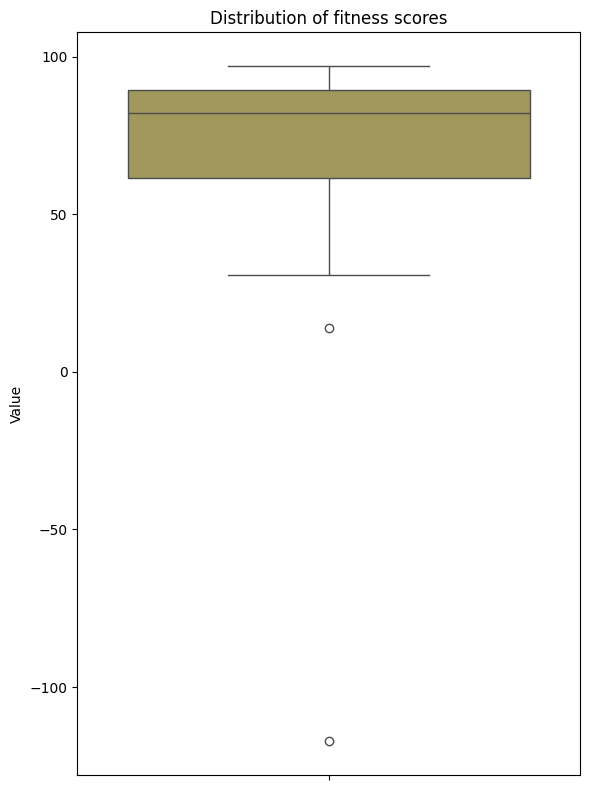

In [6]:
from utils.visualization import plot_num_feasible, plot_boxplot

plot_boxplot(fitnesses,title='Distribution of fitness scores')

In [7]:
df['best_found_is_feasible'] = df['feasibility_rate'] > 0
num_feasible = len(list(df[df['best_found_is_feasible']==True].values))
num_infeasible = len(list(df['best_found_is_feasible'].values)) - num_feasible
print(num_infeasible, num_feasible)

1 26


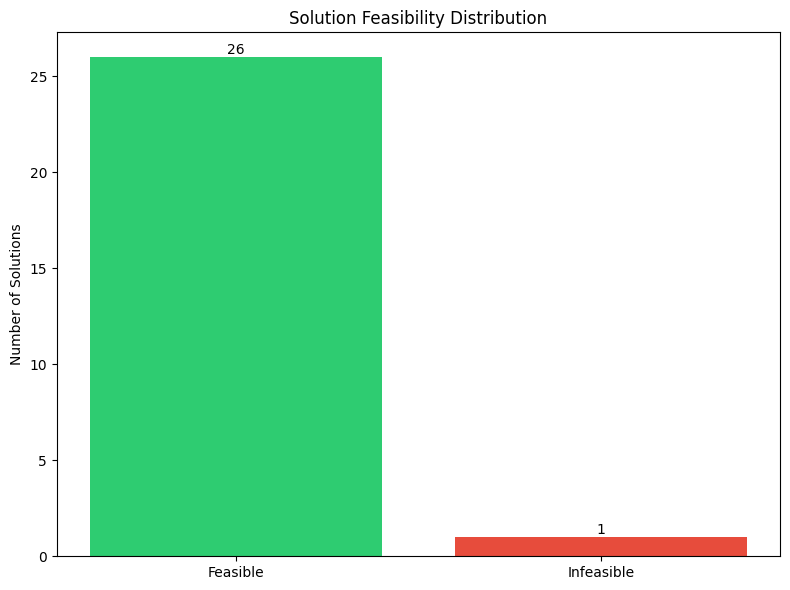

In [8]:
plot_num_feasible(num_feasible=num_feasible, num_infeasible=num_infeasible)

In [9]:
np.median(fitnesses)

np.float64(82.01717606257316)

90.0444373


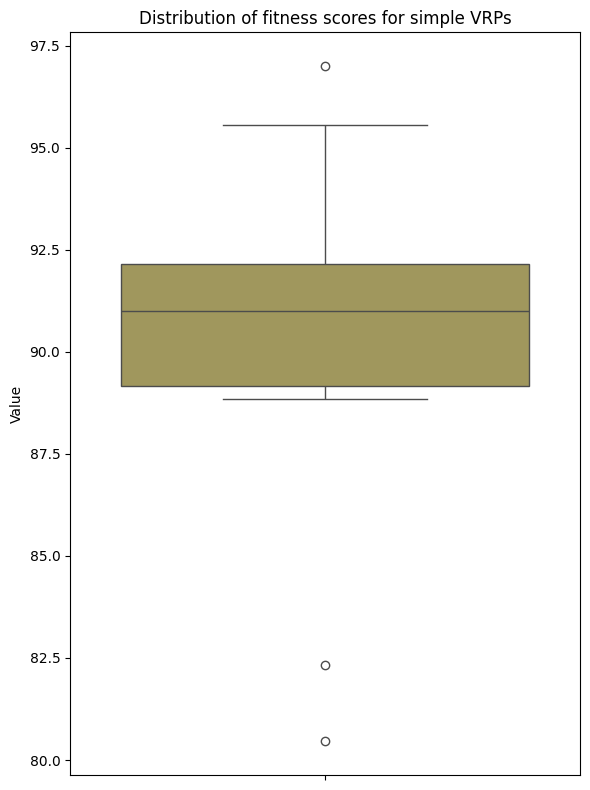

In [15]:
values_of_fitnesses_for_below_40_locations = [91.694411,
96.998638,
90.283568,
95.559257,
92.189303,
92.000766,
88.836578,
82.33,
90.094937,
80.456915
]

print(np.mean(values_of_fitnesses_for_below_40_locations))

plot_boxplot(values_of_fitnesses_for_below_40_locations, title='Distribution of fitness scores for simple VRPs')

C:\Users\Mila\Desktop\OEA_sem\src\utils\visualization.py:310: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




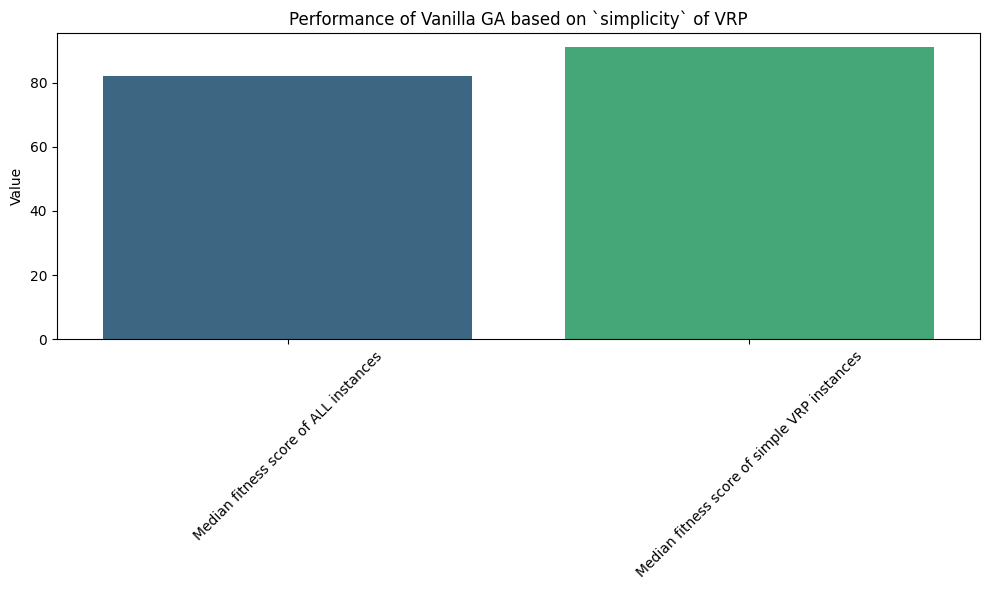

In [18]:
from utils import visualization as v
v.plot_bars(list_of_vals=[np.median(fitnesses),np.median(values_of_fitnesses_for_below_40_locations)],list_of_col_names=['Median fitness score of ALL instances', 'Median fitness score of simple VRP instances'],main_title='Performance of Vanilla GA based on `simplicity` of VRP')

In [12]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [13]:
from core.instance_loader import load_cached_instance
from core.solution_representation import VRPSolution
from utils.visualization import plot_solution

ga_routes: list[list[int]] = [
    [10, 3, 25, 37, 5, 7, 20, 32],
    [33, 35, 23, 26, 4, 16, 29, 21],
    [2, 14, 22, 27, 11, 31, 28],
    [19, 18, 34, 6, 1, 12, 30],
    [9, 8, 17, 36, 13, 15, 24]
]

instance_data: dict = load_cached_instance('A-n38-k5')

ga_solution: VRPSolution = VRPSolution(
    routes=ga_routes,
    instance_data=instance_data
)

fig = plot_solution(
    instance=instance_data,
    solution=ga_solution,
    plot_against_optimal=True,
    save=True
)

fig.show(renderer="notebook_connected")

Saved plots to:
  HTML: C:\Users\Mila\Desktop\OEA_sem\results\plots\A-n38-k5\comparison.html
  PNG: C:\Users\Mila\Desktop\OEA_sem\results\plots\A-n38-k5\comparison.png


In [22]:
df['optimal_cost'] = df['best_cost'] / (1 + df['best_gap']/100.0)

df

,instance,num_runs,best_cost,avg_cost,std_cost,worst_cost,optimal_cost,best_gap,avg_gap,std_gap,avg_dispatch_rounds,feasibility_rate,dispatch_gap,total_penalty,best_found_fitness,best_found_is_feasible
0,A-n32-k5,5,877.022597,886.665026,8.754032,902.871015,784.0,11.865127,13.095029,1.116586,1.0,100.0,0.0,0.0,91.694411,True
1,A-n33-k5,5,689.341432,735.580632,27.904598,763.869050,661.0,4.287660,11.283000,4.221573,1.0,100.0,0.0,0.0,96.998638,True
2,A-n33-k6,5,844.994183,897.248815,39.985040,961.137567,742.0,13.880618,20.923021,5.388819,1.0,100.0,0.0,0.0,90.283568,True
3,A-n34-k5,5,827.355690,922.757611,95.118271,1100.639137,778.0,6.343919,18.606377,12.225999,1.0,100.0,0.0,0.0,95.559257,True
4,A-n36-k5,5,888.153526,928.745320,31.127560,979.965889,799.0,11.158138,16.238463,3.895815,1.0,100.0,0.0,0.0,92.189303,True
5,A-n37-k5,5,745.449824,757.738233,11.721528,773.910664,669.0,11.427477,13.264310,1.752097,1.0,100.0,0.0,0.0,92.000766,True
6,A-n37-k6,5,1100.344102,1135.777257,32.763791,1192.985887,949.0,15.947745,19.681481,3.452454,1.0,100.0,0.0,0.0,88.836578,True
7,A-n38-k5,5,917.535164,1168.803328,207.813905,1450.201493,730.0,25.689748,60.110045,28.467658,1.0,100.0,0.0,0.0,82.017176,True
8,A-n39-k5,5,938.313740,1101.113337,208.426547,1510.864163,822.0,14.150090,33.955394,25.356028,1.0,100.0,0.0,0.0,90.094937,True
9,A-n39-k6,5,1063.004342,1190.034155,72.969435,1277.089143,831.0,27.918693,43.205073,8.780919,1.0,100.0,0.0,0.0,80.456915,True


In [23]:
df.to_csv(df_path)

In [24]:
df_rl = pd.read_csv(os.path.join(get_project_root(),'results','summaries','rl_ea_summary.csv'))

In [25]:
fitnesses_rl = df_rl['best_found_fitness'].values

In [26]:
np.mean(fitnesses_rl)

np.float64(86.85254413763461)

In [27]:
np.median(fitnesses_rl)

np.float64(92.6523348939076)

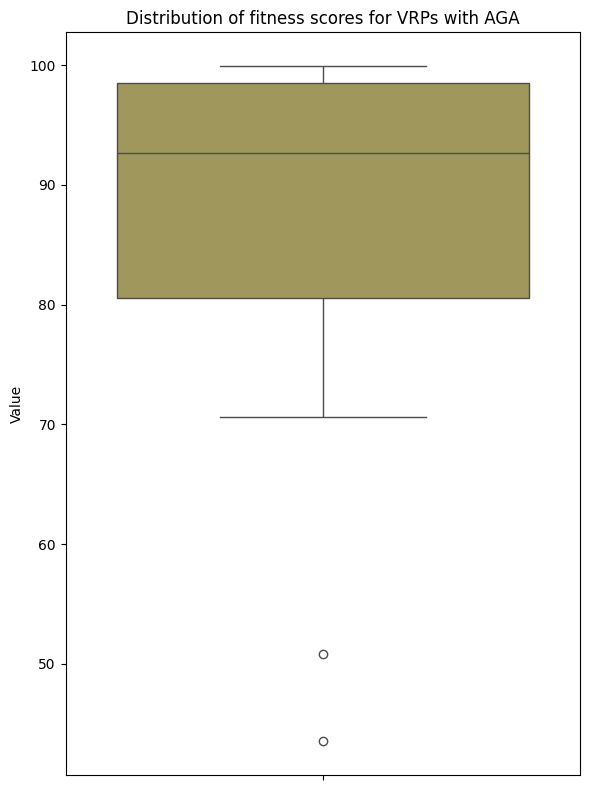

In [28]:
plot_boxplot(data=fitnesses_rl, title='Distribution of fitness scores for VRPs with AGA')

In [14]:
ga_routes_new: list[list[int]] = [
    [10, 3, 25, 37, 5, 7, 20, 32],
    [33, 35, 23, 26, 4, 16, 29, 21],
    [2, 14, 22, 27, 11, 31, 28],
    [18, 19, 34, 6, 1, 12, 30],
    [9, 8, 17, 36, 13, 15, 24]
]

ga_solution_new: VRPSolution = VRPSolution(
    routes=ga_routes_new,
    instance_data=instance_data
)

fig = plot_solution(
    instance=instance_data,
    solution=ga_solution_new,
    plot_against_optimal=True,
    save=False
)

fig.show(renderer="notebook_connected")

In [29]:
df_rl['best_found_fitness_VGA'] = fitnesses

In [30]:
df_rl['instance'][df_rl['best_found_fitness_VGA'] > df_rl['best_found_fitness']]

17     A-n55-k9
26    A-n80-k10
Name: instance, dtype: object

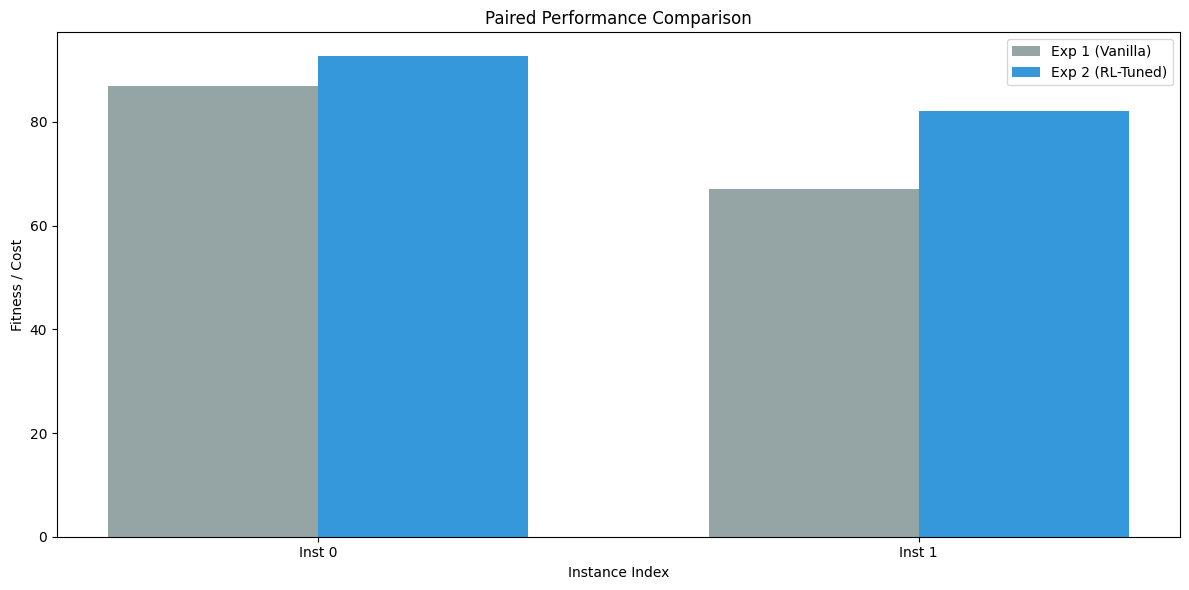

In [32]:
v.plot_pairs(exp1=[np.mean(fitnesses_rl),np.mean(fitnesses)],exp2=[np.median(fitnesses_rl),np.median(fitnesses)], )

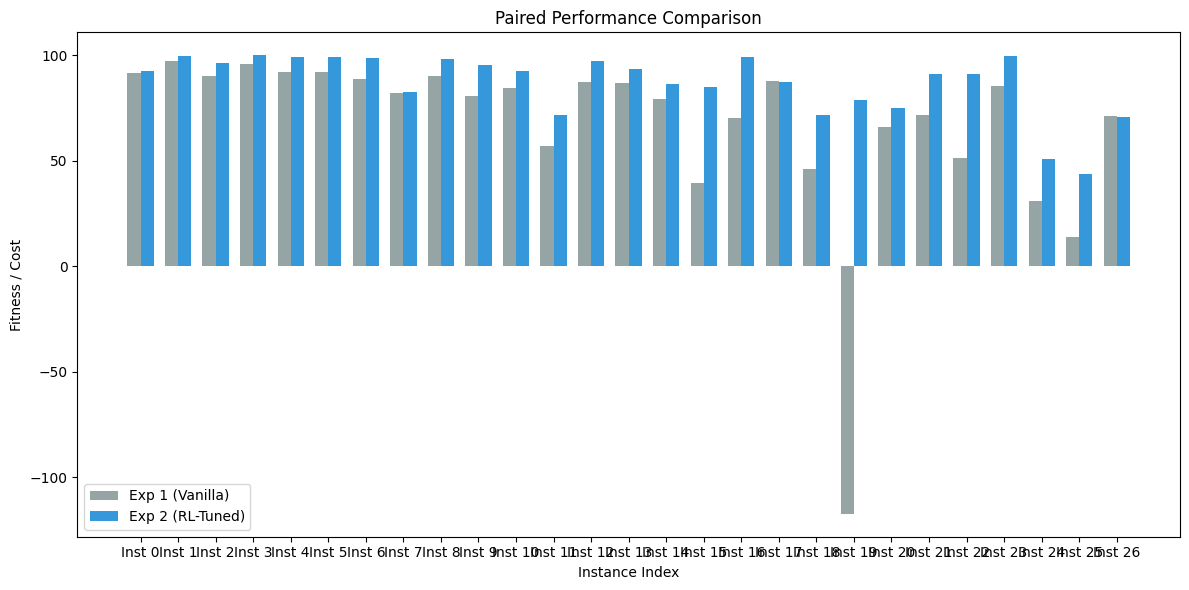

In [33]:
v.plot_pairs(fitnesses, fitnesses_rl)

Wilcoxon statistic: 5.0
p-value: 1.4901161193847656e-07
effect size r: 0.8507448314337341


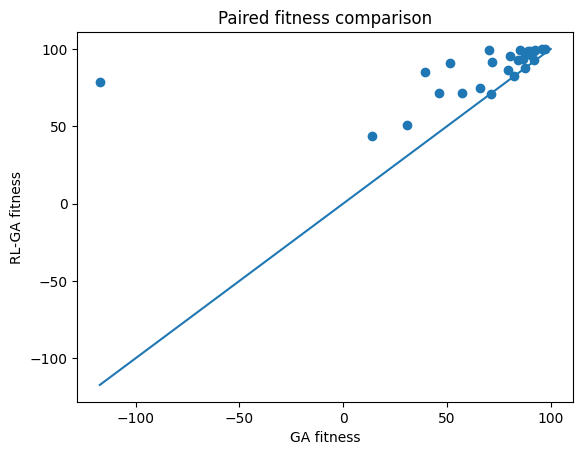

C:\Users\Mila\AppData\Local\Temp\ipykernel_15964\2256546823.py:32: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



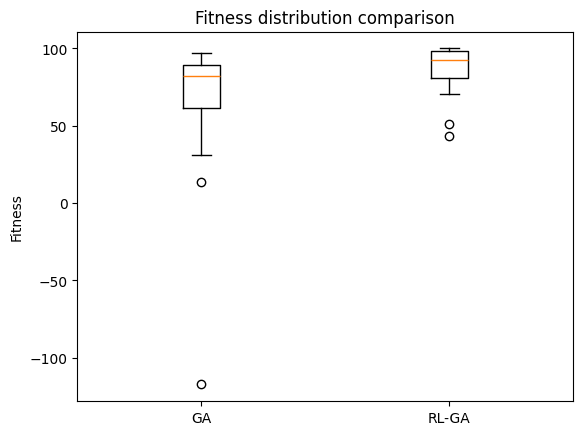

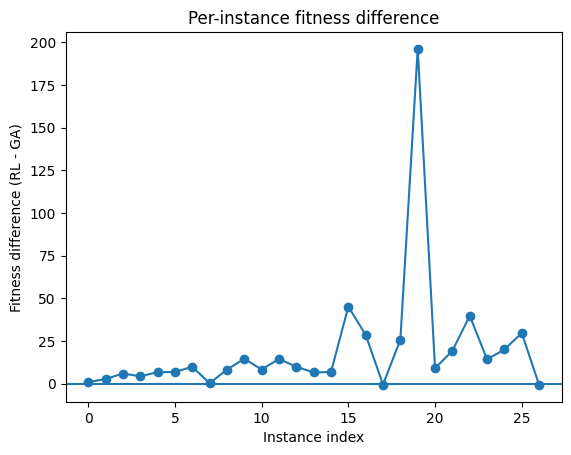

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

fitnesses = np.asarray(fitnesses)
fitnesses_rl = np.asarray(fitnesses_rl)

stat, p = wilcoxon(fitnesses, fitnesses_rl)

diff = fitnesses_rl - fitnesses
n = len(diff)
z = (stat - n * (n + 1) / 4) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
r = abs(z) / np.sqrt(n)

print("Wilcoxon statistic:", stat)
print("p-value:", p)
print("effect size r:", r)

plt.figure()
plt.scatter(fitnesses, fitnesses_rl)
lims = [
    min(fitnesses.min(), fitnesses_rl.min()),
    max(fitnesses.max(), fitnesses_rl.max())
]
plt.plot(lims, lims)
plt.xlabel("GA fitness")
plt.ylabel("RL-GA fitness")
plt.title("Paired fitness comparison")
plt.show()

plt.figure()
plt.boxplot([fitnesses, fitnesses_rl], labels=["GA", "RL-GA"])
plt.ylabel("Fitness")
plt.title("Fitness distribution comparison")
plt.show()

plt.figure()
plt.plot(diff, marker="o")
plt.axhline(0)
plt.xlabel("Instance index")
plt.ylabel("Fitness difference (RL - GA)")
plt.title("Per-instance fitness difference")
plt.show()
